In [ ]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

<font color="lightblue">The STFT spectrogram (dB) shows how the track evolves over time from an audio-engineering perspective. At the beginning of the piece, energy is concentrated mainly in the low and mid frequencies, while the high-frequency content is relatively weak. As the climactic sections enter, the energy expands in a broadband manner up to approximately 18–20 kHz, indicating the simultaneous presence of punchy drums, distorted guitars, and cymbals. The prominent vertical lines correspond to strong transients and an active rhythmic structure, and a distinct break around 2:30 appears as a sudden drop in overall energy.
<font>

In [7]:
audio_path = "All I wanted - paramore.mp3"
y, sr = librosa.load(audio_path, sr=None, mono=True)

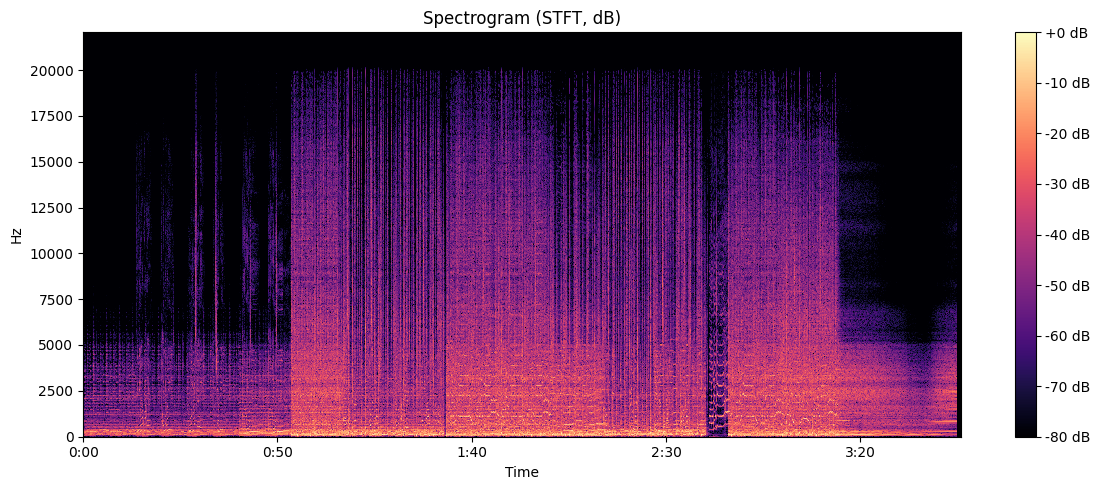

In [8]:
# STFT parameters
n_fft = 2048
hop_length = 512
win_length = 2048

S = np.abs(librosa.stft(y, n_fft=n_fft, hop_length=hop_length, win_length=win_length))**2
S_db = librosa.power_to_db(S, ref=np.max)

# Plot: STFT Spectrogram
plt.figure(figsize=(12, 5))
librosa.display.specshow(S_db, sr=sr, hop_length=hop_length, x_axis="time", y_axis="hz")
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram (STFT, dB)")
plt.tight_layout()
plt.show()

<font color="lightblue">The Mel-spectrogram (dB) presents the same changes from the perceptual standpoint of human hearing. The low and mid bands where vocals and the core musical body reside are emphasized, and the verse-chorus structure becomes more apparent as clear blocks of energy. As a result, the dominant role of vocals and harmony in the climactic sections, as well as the song’s overall dynamic variations, are easier and more intuitive to identify compared to the raw STFT representation.
<font>

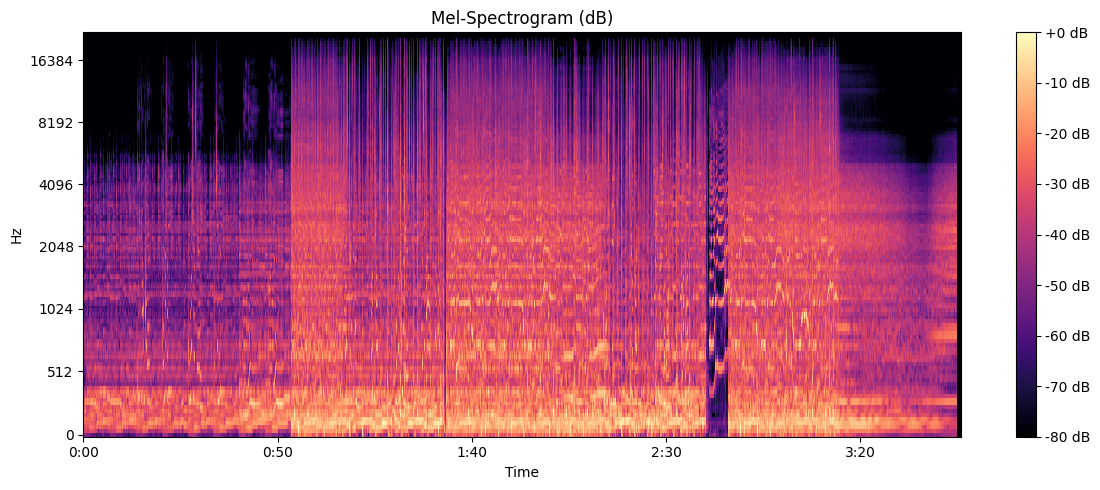

In [9]:
# Mel-Spectrogram dB
mel = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=128, fmax=sr/2)
mel_db = librosa.power_to_db(mel, ref=np.max)

# --- Plot: Mel Spectrogram ---
plt.figure(figsize=(12, 5))
librosa.display.specshow(mel_db, sr=sr, hop_length=hop_length, x_axis="time", y_axis="mel")
plt.colorbar(format="%+2.0f dB")
plt.title("Mel-Spectrogram (dB)")
plt.tight_layout()
plt.show()


In [10]:
rms = librosa.feature.rms(y=y, frame_length=n_fft, hop_length=hop_length)[0]
centroid = librosa.feature.spectral_centroid(y=y, sr=sr, n_fft=n_fft, hop_length=hop_length)[0]

print("Sample rate:", sr)
print("Duration (sec):", len(y)/sr)
print("RMS (mean):", float(np.mean(rms)))
print("Spectral Centroid (mean Hz):", float(np.mean(centroid)))

Sample rate: 44100
Duration (sec): 225.78666666666666
RMS (mean): 0.2431097775697708
Spectral Centroid (mean Hz): 2423.291735162308


<font color="lightblue">From the start up to  0:50, the track has low energy with a focus on low and mid frequencies,probably a verse or a calm introductory section. From around 0:50 to 2:30, a clear increase in broadband energy occurs, indicating the entry of powerful choruses with punchy drums, distorted guitars, and a strong vocal presence in the mid-frequency range. Around 2:30, a dramatic break is observed, marked by a sudden drop in energy that emphasizes the transition to the next section; after this point, the energy returns but gradually tapers off toward the end of the song.

Overall, the STFT highlights the prominent role of transients and rhythmic activity, while the Mel-spectrogram emphasizes the controlled presence of vocals and the musical body. The result is a layered, dynamic arrangement with clear peaks, yet one that remains well controlled from a mixing and mastering perspective.
<font>